In [2]:
import pickle
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import defaultdict
from encoders import Tokenizer, BertVectorizer
import seaborn as sns

print("\n\n库已加载！")



库已加载！


In [3]:
df = pd.read_csv('D:\GraduationDesign\sms-spam-detector\data\spam.csv', skiprows=1, names=['label', 'message'],
                 encoding="ISO-8859-1")

In [4]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
# 去除缺失值，去除重复项
df = df.dropna(how='all').reset_index(drop=True)  # 删除所有值为NaN的行
df = df.drop_duplicates(subset=['message'], keep=False).sample(frac=1).reset_index(drop=True)  # 删除内容重复的行并打乱顺序

In [6]:
with open(r"D:\GraduationDesign\sms-spam-detector\data\spam_clear.pkl", "wb") as f:
    pickle.dump(df, f)

In [20]:
spam_labels = df['label'].replace('ham', 0).replace('spam', 1)

Dataset size:  (4869, 2)


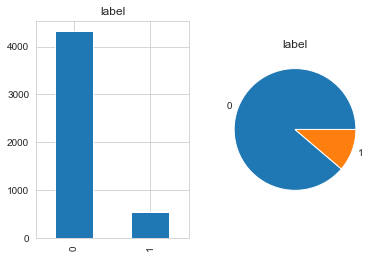

In [21]:
_, ax = plt.subplots(1, 2)
spam_labels.value_counts().plot(ax=ax[0], kind="bar", rot=90, title='label');
spam_labels.value_counts().plot(ax=ax[1], kind="pie", rot=90, title='label', ylabel='').get_figure().savefig(r'D:\GraduationDesign\sms-spam-detector\image\ham_vs_spam.png');
print("Dataset size: ", df.shape)

In [22]:
print(df.head())

  label                                            message
0   ham           Come to mahal bus stop.. &lt;DECIMAL&gt;
1   ham  Goodmorning, today i am late for 2hrs. Because...
2   ham     I've got  &lt;#&gt; , any way I could pick up?
3  spam  FREE MSG:We billed your mobile number by mista...
4  spam  Urgent! Please call 0906346330. Your ABTA comp...


In [23]:
# 创建BoW、TFIDF编码器

bow = CountVectorizer(
    analyzer='word',
    # ngram_range = (1, 2),
    strip_accents='ascii',
    tokenizer=Tokenizer.tokenize_stem,
    lowercase=True,
    stop_words=Tokenizer.english_stopwords,
    max_features=512,  # We set the same dim as BERT
)
tfidf = TfidfVectorizer(
    analyzer='word',
    # ngram_range = (2, 2),
    strip_accents='ascii',
    tokenizer=Tokenizer.tokenize_stem,
    lowercase=True,
    stop_words=Tokenizer.english_stopwords,
    max_features=512,
)
bert = BertVectorizer()
print("BoW、TFIDF、Bert编码器创建完成!")

BoW、TFIDF、Bert编码器创建完成!


In [24]:
# 使用部分数据快速尝试三个编码器
N_data = 500
bow_vecs = bow.fit_transform(df['message'][:N_data])
tfidf_vecs = tfidf.fit_transform(df['message'][:N_data])

df_bow = pd.DataFrame(data=bow_vecs.todense(), columns=bow.get_feature_names_out())
df_tfidf = pd.DataFrame(data=tfidf_vecs.todense(), columns=tfidf.get_feature_names_out())
display(df_bow.head(), df_tfidf.head())
print("BoW data size: ", bow_vecs.shape)
print("TFIDF data size: ", tfidf_vecs.shape)
print("Vocabulary: ", bow.get_feature_names_out())

,aa,ad,age,ah,alreadi,also,alway,ani,anyth,anyway,...,yar,yay,yeah,year,yes,yesterday,yet,yo,yr,yup
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,aa,ad,age,ah,alreadi,also,alway,ani,anyth,anyway,...,yar,yay,yeah,year,yes,yesterday,yet,yo,yr,yup
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.371383,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.304024,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


BoW data size:  (500, 512)
TFIDF data size:  (500, 512)
Vocabulary:  ['aa' 'ad' 'age' 'ah' 'alreadi' 'also' 'alway' 'ani' 'anyth' 'anyway'
 'appli' 'ard' 'area' 'around' 'ask' 'auction' 'avail' 'avoid' 'award' 'b'
 'babe' 'babi' 'back' 'bad' 'bank' 'bath' 'becaus' 'bed' 'befor' 'best'
 'better' 'bid' 'bill' 'bit' 'blank' 'book' 'bout' 'brother' 'bus' 'buy'
 'c' 'call' 'camera' 'cant' 'car' 'care' 'chanc' 'chang' 'charg' 'chariti'
 'chat' 'check' 'claim' 'class' 'clean' 'click' 'close' 'club' 'collect'
 'come' 'confirm' 'congratul' 'connect' 'contact' 'contract' 'cos' 'cost'
 'could' 'crave' 'credit' 'cri' 'custom' 'da' 'dat' 'date' 'day' 'dear'
 'den' 'didnt' 'dinner' 'dis' 'discount' 'doesnt' 'done' 'dont' 'doubl'
 'draw' 'dream' 'drink' 'drive' 'drug' 'dude' 'dun' 'e' 'earli' 'easi'
 'eat' 'els' 'end' 'enjoy' 'entri' 'eve' 'even' 'everi' 'fanci' 'fee'
 'feel' 'felt' 'fetch' 'film' 'final' 'find' 'fine' 'finish' 'first' 'fix'
 'flash' 'follow' 'forgot' 'found' 'free' 'friday' 'friend'

In [25]:
print(type(bow_vecs))
print(bow_vecs)

<class 'scipy.sparse.csr.csr_matrix'>
  (0, 59)	1
  (0, 38)	1
  (0, 403)	1
  (0, 230)	1
  (1, 432)	1
  (1, 201)	1
  (1, 173)	1
  (1, 26)	1
  (1, 22)	1
  (1, 301)	1
  (2, 185)	1
  (2, 141)	1
  (2, 231)	1
  (2, 7)	1
  (2, 471)	1
  (2, 67)	1
  (2, 314)	1
  (3, 120)	2
  (3, 32)	1
  (3, 256)	1
  (3, 283)	1
  (3, 319)	1
  (3, 41)	2
  (3, 48)	1
  (3, 198)	1
  :	:
  (497, 373)	1
  (497, 176)	1
  (497, 131)	1
  (497, 215)	1
  (497, 3)	1
  (497, 225)	1
  (497, 115)	1
  (497, 337)	1
  (497, 335)	1
  (497, 326)	1
  (498, 267)	1
  (498, 177)	2
  (498, 453)	1
  (498, 153)	1
  (498, 459)	1
  (498, 112)	1
  (498, 271)	1
  (498, 191)	1
  (498, 9)	1
  (498, 444)	1
  (498, 398)	1
  (499, 84)	1
  (499, 197)	1
  (499, 88)	1
  (499, 298)	1


In [26]:
bert_vecs = bert.fit_transform(df['message'][:N_data])



使用BERT模型编码中... 
.   0
.................................................................................................... 100
.................................................................................................... 200
.................................................................................................... 300
.................................................................................................... 400
...................................................................................................

In [27]:
print(bert_vecs)

[[ 0.03859033 -0.07150272  0.01082191 ... -0.05140113 -0.02370287
   0.02131957]
 [-0.01325662 -0.0284776  -0.02253423 ... -0.00691585  0.02240277
  -0.0080877 ]
 [ 0.03244037  0.00768044  0.01910841 ...  0.0101552  -0.0432193
  -0.01309743]
 ...
 [ 0.02127289  0.01128367  0.00672932 ... -0.01876338 -0.00521761
   0.02333349]
 [-0.11255754  0.0274834  -0.00642046 ... -0.02467414 -0.02188128
   0.00050246]
 [ 0.00377843  0.03320776  0.00196071 ... -0.03374775 -0.03293325
   0.04077452]]


In [28]:
def encode_data(data, N_data):
    bow_vecs = bow.fit_transform(data['message'][:N_data])
    print("BoW 编码...完成！")
    tfidf_vecs = tfidf.fit_transform(data['message'][:N_data])
    print("TFIDF 编码...完成！")
    bert_vecs = bert.fit_transform(data['message'][:N_data])
    print("BERT 编码...完成！")
    spam_vecs = defaultdict(list)
    spam_vecs["BoW"] = bow_vecs.todense().A  # matrix->array
    spam_vecs["TFIDF"] = tfidf_vecs.todense().A
    spam_vecs["BERT"] = bert_vecs
    return spam_vecs
print("编码函数已加载！")

编码函数已加载！


In [14]:
# fig = sns.heatmap(1-bow_vecs.todense().A).set_title("BoW");

In [15]:
# fig.get_figure().savefig(r"D:\GraduationDesign\sms-spam-detector\image\test_bow.png")

In [29]:
# 数据编码可视化函数
def show_embeddings(data_vecs):
    n_rows = len(data_vecs)
    fig, axs = plt.subplots(nrows=n_rows, sharex=True, figsize=(8, 3 * n_rows))

    for i, key in enumerate(data_vecs.keys()):
        encode_name = ("Encoder: %s") % key
        sns.heatmap(1 - data_vecs[key], ax=axs[i]).set_title(encode_name);
    fig.get_figure().savefig(r"D:\GraduationDesign\sms-spam-detector\image\bow_tfidf_bert.png")
print("可视化函数已加载！")

可视化函数已加载！


In [30]:
encode_df = encode_data(df, df.shape[0]) # 执行较慢

BoW 编码...完成！
TFIDF 编码...完成！


使用BERT模型编码中... 
.   0
.................................................................................................... 100
.................................................................................................... 200
.................................................................................................... 300
.................................................................................................... 400
.................................................................................................... 500
.................................................................................................... 600
.................................................................................................... 700
.................................................................................................... 800
.................................................................................................... 900
...

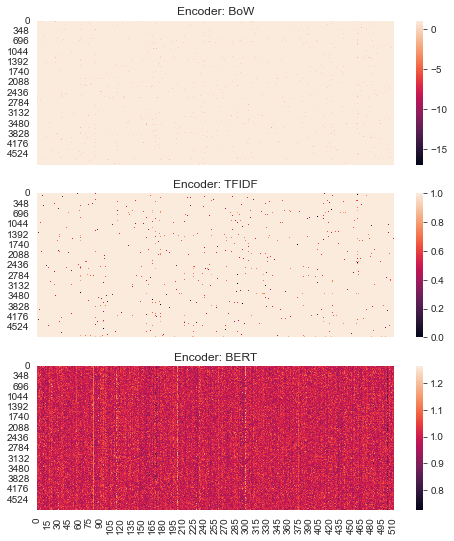

In [31]:
show_embeddings(encode_df)

In [32]:
with open(r"D:\GraduationDesign\sms-spam-detector\data\spam_dic.pkl", "wb") as f:
    pickle.dump(encode_df, f)

In [33]:
with open(r"D:\GraduationDesign\sms-spam-detector\data\spam_label.pkl", "wb") as f:
    pickle.dump(spam_labels, f)